# Линейная регрессия
---
В этой тетрадке гайд по написанию собственной линейной регрессии ᕕ( ՞ ᗜ ՞ )ᕗ.

А ещё полезные советы про переобучение.

In [0]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных
Поработаем со стандартным датасетом про больных диабетом.

Про каждого пациента (объект выборки) известно всякое -- глюкоза в крови в разное время суток, суточная активность...
Необходимо предсказать оптимальную дозу инсулина.

Ссылка на датасет: http://archive.ics.uci.edu/ml/datasets/diabetes

In [0]:
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()

In [3]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [0]:
data = pandas.DataFrame(diabetes.data, columns=["q" + str(i) for i in range(1, 11)])
data["doze"] = diabetes.target

In [5]:
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,doze
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Выведи размер таблицы данных и несколько первых строк:

In [6]:
#<твой код>
print(data.shape)
print(data[:2])

(442, 11)
         q1        q2        q3        q4  ...        q8        q9       q10   doze
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646  151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204   75.0

[2 rows x 11 columns]


Выдели в данных признаки `X` и целевое значение `y`.

In [7]:
X = data.iloc[:, :data.shape[1] -1] #<твой код>
print(X)
Y = data.iloc[:, data.shape[1]  - 1:] #<твой код>
print(Y)

           q1        q2        q3  ...        q8        q9       q10
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]
      doze
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
..     ...
437  178.0
438  104.0
439  132.0
440  220.0
441   57.0

[442 rows x 1 

Добавь в X признак-единицу как колонку "q0".

In [8]:
#<твой код>
X["q0"] = [0 for i in range(data.shape[0])]
print(X)

           q1        q2        q3        q4  ...        q8        q9       q10  q0
0    0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646   0
1   -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204   0
2    0.085299  0.050680  0.044451 -0.005671  ... -0.002592  0.002864 -0.025930   0
3   -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022692 -0.009362   0
4    0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031991 -0.046641   0
..        ...       ...       ...       ...  ...       ...       ...       ...  ..
437  0.041708  0.050680  0.019662  0.059744  ... -0.002592  0.031193  0.007207   0
438 -0.005515  0.050680 -0.015906 -0.067642  ...  0.034309 -0.018118  0.044485   0
439  0.041708  0.050680 -0.015906  0.017282  ... -0.011080 -0.046879  0.015491   0
440 -0.045472 -0.044642  0.039062  0.001215  ...  0.026560  0.044528 -0.025930   0
441 -0.045472 -0.044642 -0.073030 -0.081414  ... -0.039493 -0.004220  0.003064   0

[44

In [0]:
X = np.array(X)
Y = np.array(Y)

### Посмотрим на данные
Посмотрим на распределения разных признаков:

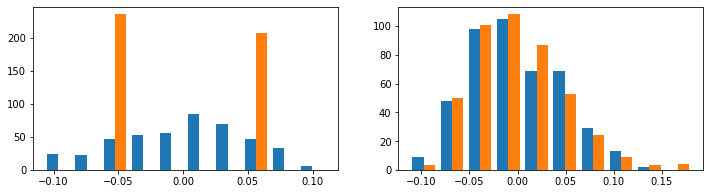

In [10]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.hist([data["q1"], data["q2"]])
plt.subplot(1, 2, 2)
p = plt.hist([data["q4"], data["q7"]])

Построй гистограмму для "doze" и вычисли среднюю дозу инсулина:

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

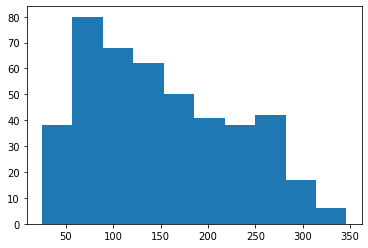

In [11]:
#<твой код>
plt.hist([data["doze"]])

In [12]:
average_doze = Y.sum() / len(Y) #<твой код>
print(average_doze)

152.13348416289594


Посмотрим теперь на зависимость чего-нибудь одного от чего-нибудь другого:

x -- первый признак

y -- второй признак

цвет -- величина дозы

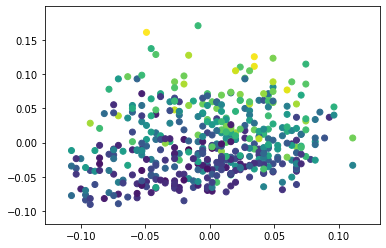

In [13]:
plt.scatter(data["q1"], data["q3"], c=data["doze"] / np.max(data["doze"]))

Построй scatter (график из точек) для признаков q3, q4.

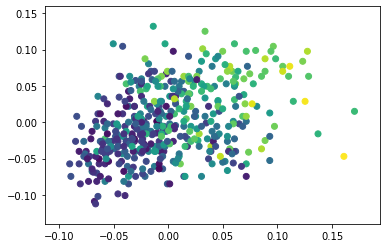

In [14]:
#<твой код>
plt.scatter(data["q3"], data["q4"], c=data["doze"] / np.max(data["doze"]))

## Сделай сам!
Напишем теперь свою линейную регрессию и применим её для предсказания оптимальных доз инсулина для больных сахарным диабетом.

### Построение модели

In [0]:
def predict(W, X):
    """получить прогноз h(X|w)"""
    
    # размерность ответа
    size = X.shape[0] #<твой код>
    
    pred = W.dot(X.reshape(1, -1)).sum()
    
    return np.array(pred).reshape(-1, 1)

In [16]:
W = np.array([-0.5, 0.5, -0.5, 0.5, -0.5, -0.5, 0.5, 0.5, 0.5, -0.5, 150]).reshape(-1, 1)
pred = predict(W, X)
print(pred.shape)
print(pred[:10])

(1, 1)
[[-1.09935172e-10]]


In [0]:
def loss(X, Y, W):
    """функция потерь J(X, Y, W)"""
    
    # предсказание по модели
    pred = predict(W, X) #<твой код>
    
    # вектор разностей предсказаний и реальных значений
    error = pred - Y #<твой код> 
    
    # вектор из квадратов ошибок
    squared_error = error ** 2 #<твой код>
    
    # среднее по ним
    mean_squared_error = squared_error.sum() / len(squared_error) #<твой код>

    return mean_squared_error

In [18]:
mse = loss(X, Y, W)
print(mse)

29074.481900485942


In [0]:
def gradient(X, Y, W):
    """вектор градиента функции потерь"""
    
    # размер вектора градиента
    len_gradient = X.shape[1]  #<твой код>
    
    gradient = []
    print(X.shape, Y.shape, W.shape)
    gradient = 2 * X.T.dot((X.dot(W) - Y))
    
    # вспомогательные вычисления
    
    return np.array(gradient).reshape(-1, 1)

In [20]:
grad = gradient(X, Y, W)
print(grad.shape)
print(grad)

(442, 11) (442, 1) (11, 1)
(11, 1)
[[ -609.42366817]
 [ -138.73470096]
 [-1899.97850177]
 [-1429.31920289]
 [ -687.8541478 ]
 [ -565.12695284]
 [ 1278.45626309]
 [-1394.53381085]
 [-1832.5302296 ]
 [-1239.54562163]
 [    0.        ]]


In [0]:
def train_model(X, Y, step=0.1, n_steps=100):
    # создадим нулевой вектор весов
    ## сколько должно быть весов
    len_w = X.shape[1] #<твой код>
    W = np.zeros(len_w)
    
    for i in range(n_steps):
        # новый вектор весов
        W = W - gradient(X, Y, W)#<твой код>

    return W

### Обучение модели
Для дальнейшей проверки надо разбить выборку на train и test, для этого в sklearn есть функция `train_test_split`:

In [49]:
from sklearn.model_selection import train_test_split

a1 = [1, 2, 3, 4, 5]
a2 = [5, 4, 3, 2, 1]
print(train_test_split(a1, a2, train_size=0.6))

[[2, 4, 1], [3, 5], [4, 2, 5], [3, 1]]


Раздели выборку на обучающую и тестовую (размер обучающей выборки -- три четверти), выведи их размеры.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y) #<твой код>
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#<твой код>

(37, 1)
(13, 1)
(37, 1)
(13, 1)


Обучи модель на тренировочной выборке:

In [51]:
W = train_model(X_train, Y) #<твой код>
print(W)

(37, 1) (50, 1) (1,)


ValueError: ignored

### Оценка качества
Получи прогноз на тренировочной и тестовой выборке:

In [52]:
Y_train_predict = predict(W, X_train) #<твой код>
Y_test_predict = predict(W, X_test) #<твой код>

AttributeError: ignored

Посчитай среднеквадратичные ошибки:

In [42]:
x_train_error = loss(X_train, Y, W) #<твой код>
x_test_error = loss(X_train, Y, W) #<твой код>

AttributeError: ignored

In [43]:
print("ошибка на X_train: %s" % x_train_error)
print("ошибка на X_test: %s" % x_test_error)

ошибка на X_train: 28117.1870345548
ошибка на X_test: 28117.1870345548


## Scikit-learn

Сгенерируем простенькие данные для линейной регрессии:

In [0]:
# 50 чисел от 0 до 10
X = pandas.DataFrame(np.arange(0, 10, 0.2), columns=[1])
# целевая переменная -- зашумлённые значения X
Y = X + 3 * (np.random.RandomState(153).random_sample(X.shape) - 0.5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=153, train_size=0.6)

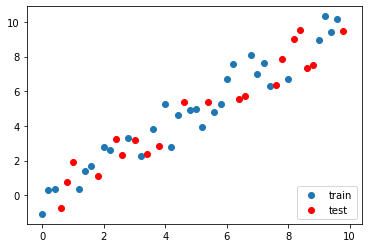

In [29]:
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, c='r', label='test')
plt.legend(loc='lower right')

Объект класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) -- классификатор с заданными параметрами. Наиболее важные методы классификатора: *fit*, *predict*.

In [0]:
# подключение класса из модуля sklearn
from sklearn.linear_model import LinearRegression

In [0]:
# cоздать
linreg_model = LinearRegression()
# обучить по train
linreg_model.fit(X_train, Y_train)
# предсказать для test
Y_pred = linreg_model.predict(X_test)

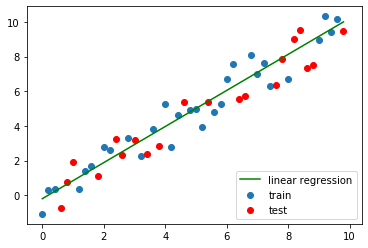

In [32]:
Y_plot = linreg_model.predict(X)
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, c='r', label='test')
plt.plot(X, Y_plot, c='g', label='linear regression')
plt.legend(loc="lower right")

Ошибка предсказаний характеризует, насколько сильно истинные значения **Y_test** отличаются от предсказанных **Y_pred**.

Посмотрим на среднеквадратичную ошибку (MSE -- Mean Squared Error):

In [33]:
from sklearn.metrics import mean_squared_error

print("Train MSE error:", mean_squared_error(Y_train, linreg_model.predict(X_train)))
print("Test MSE error:", mean_squared_error(Y_test, Y_pred))

Train MSE error: 0.6070167149628751
Test MSE error: 0.7633938922329823


### *Для развлечения на потом*
Можно сравнить качество и скорость работы (%%time -- см. titanic_01) своей линейной регрессии с sklearn-овской.

## Добавление признаков

Попробуем улучшить качество модели за счёт добавления степеней переменной $x$.

Добавь в таблицу X степени до $8$-ой включительно.

In [34]:
X[:3]

,1
0,0.0
1,0.2
2,0.4


In [0]:
poly_X = X.copy()
#<твой код>

In [36]:
poly_X[:3]

,1
0,0.0
1,0.2
2,0.4


Разобьём выборку с новыми признаками на train и test:

In [0]:
poly_X_train, poly_X_test = train_test_split(poly_X, random_state=153, train_size=0.6)

Обучи модель линейной регрессии на новых признаках:

In [0]:
# cоздать
poly_linreg_model = LinearRegression()

# обучить по train
#<твой код>

# предсказать для test
#<твой код>

Нарисуем новый график (просто выполни ячейку):

In [39]:
poly_Y_plot = poly_linreg_model.predict(poly_X)
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, c='r', label='test')
plt.plot(X, poly_Y_plot, c='g', label='linear regression')
plt.legend(loc="lower right")

NotFittedError: ignored

Посмотрим теперь на ошибки на train и test -- получился слишком сильный подгон под обучающую выборку:

In [0]:
print("Train MSE error:", mean_squared_error(Y_train, poly_linreg_model.predict(poly_X_train)))
print("Test MSE error:", mean_squared_error(Y_test, poly_Y_pred))

С увеличением степени признаков ошибка на обучающей выборке будет уменьшаться, а на тестовой -- увеличиваться.

## Как с этим бороться?
Регуляризованная линейная регрессия [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) в sklearn:

In [0]:
from sklearn.linear_model import Ridge

# alpha -- коэффициент регуляризации
# чем он больше, тем сильнее ограничивается модель
reg_linreg_model = Ridge(alpha=5, random_state=153)

reg_linreg_model.fit(poly_X_train, Y_train)

reg_Y_pred = reg_linreg_model.predict(poly_X_test)

In [0]:
reg_Y_plot = reg_linreg_model.predict(poly_X)
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, c='r', label='test')
plt.plot(X, reg_Y_plot, c='g', label='linear regression')
plt.legend(loc="lower right")

Теперь ошибки на train и test отличаются не так сильно:

In [0]:
print("Train MSE error:", mean_squared_error(Y_train, reg_linreg_model.predict(poly_X_train)))
print("Test MSE error:", mean_squared_error(Y_test, reg_Y_pred))